In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools as it
import jieba
import re
import numpy as np
from func import *

In [2]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine
from io import StringIO

In [3]:
def readPDF(file_name):
    parser = PDFParser(open(file_name, 'rb'))
    doc = PDFDocument()
    parser.set_document(doc)
    doc.set_parser(parser)
    doc.initialize('')
    rsrcmgr = PDFResourceManager()
    device = PDFPageAggregator(rsrcmgr, laparams = LAParams(all_texts = True))
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    content = []

    for page in doc.get_pages():
        interpreter.process_page(page)
        layout = device.get_result()
        text = ''
        for lt_obj in layout:
            if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
                text += re.sub('\s', '', lt_obj.get_text())
        content.append(text)
    return content

In [4]:
def getBetween(file ,p_1, text_1, p_2, text_2):
    page_1 = file[p_1]
    page_2 = file[p_2]
    btn = ''
    btn += page_1[page_1.find(text_1):-1]
    for i in range(p_1 + 1, p_2, 1):
        btn += file[i]
    btn += page_2[0:(page_2.find(text_2) + len(text_2))]
    return btn

In [5]:
def dictcombine(dictionary, words):
    text = ''
    freq = []
    for i in range(len(words)):
        text += words[i]
        freq.append(dictionary.pop(words[i]))

    minimum = min(freq)
    dictionary[text] = minimum
    for i in range(len(words)):
        residue = freq[i] - minimum
        if residue > 0:
            dictionary[words[i]] = residue
    return dictionary

In [6]:
text = readPDF('2707 2017 晶華.pdf')
print('Total Pages : ', len(text))

Total Pages :  215


In [7]:
str = getBetween(text, 4, '壹、致股東報告書', 5, '長期的支持與指教。')+getBetween(text, 77, '關鍵查核事項', 80, '備供參考。')
print(str[0:500], '\n......\n', str[-500:])

壹、致股東報告書各位股東女士、先生們：2017年台灣整體觀光產業的景氣成長趨勢緩慢，雖然整體來台旅客仍達到1074萬人次，但比2016年僅成長(+0.45%)，由於國內新的旅館房間數年增率為(+4.9%)，因此來台旅客的成長數仍跟不上新旅館的增加數。觀光局雖極力開拓多元市場，南進布局開拓東南亞客源，但佔本公司主要客源的日本市場，也因日幣升值及機位不足致成長率只有(+0.17%)，本公司為因應市場的變動仍積極開發韓國及其他地區的客源市場，以降低對營運的影響，另外2017年本公司子公司太魯閣晶英、台南晶英及達美樂表現優異，不但營收增加，獲利也大幅提高。一、謹將本公司2017年度營業結果報告如下：（一）營業報告：1.客房：本公司合併客房部門2017年共接待旅客828,706人次，較2016年同期之787,688人次增加41,018人次，增加幅度為5.2%，所有旅客中本國旅客佔44.6%，日本旅客佔17.6%，港澳地區旅客佔9.5%，大陸地區旅客佔5.6%，東南亞旅客佔4.0%，韓國旅客佔8.2%，美加旅客佔4.4%，歐洲地區旅客佔3.0%，其他地區旅客佔3.2%。客房住房率各為台北晶華75. 
......
 性，包含下列程序：(1)所使用之預計成長率，與歷史結果、經濟及產業預測文獻比較。(2)所使用之折現率，與市場中類似資產報酬率比較，並檢查其現金產生單位資金成本假設，包括權益資金比重與產業權益資金比例比較，權益資金成本與產業之風險係數及市場風險貼水比較。~76~(3)檢查評價模型參數與計算公式之設定。其他事項–提及其他會計師之查核列入晶華集團合併財務報表之部分子公司，其財務報表未經本會計師查核，而係由其他會計師查核。因此，本會計師對上開合併財務報表所表示之意見中，有關該等子公司財務報表所列金額及附註十三所揭露之相關資訊，係依據其他會計師之查核報告。該等子公司民國106年及105年12月31日之資產總額分別為新台幣158,944仟元及162,663仟元，各占合併資產總額之2.15%及2.16%，民國106年及105年1月1日至12月31日之營業收入淨額分別為新台幣551,582仟元及542,880仟元，各占合併營業收入淨額之7.87%及7.92%。其他事項–個體財務報告晶華國際酒店股份有限公司已編製民國106年度及105年度個體財務報表，並經本會計師出具無保留意見之查核

In [8]:
seg_list = jieba.cut(str[0:5000], cut_all=False)
print(" / ".join(seg_list))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
DEBUG:jieba:Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.605 seconds.
DEBUG:jieba:Loading model cost 1.605 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


壹 / 、 / 致股 / 東報 / 告書 / 各位 / 股東 / 女士 / 、 / 先生 / 們 / ： / 2017 / 年 / 台灣 / 整體 / 觀光產業 / 的 / 景氣 / 成長 / 趨勢 / 緩慢 / ， / 雖然 / 整體 / 來 / 台 / 旅客 / 仍達 / 到 / 1074 / 萬 / 人次 / ， / 但 / 比 / 2016 / 年僅 / 成長 / ( / + / 0.45% / ) / ， / 由 / 於 / 國內 / 新 / 的 / 旅館 / 房間數 / 年增率 / 為 / ( / + / 4.9% / ) / ， / 因此 / 來台 / 旅客 / 的 / 成長 / 數仍 / 跟不上 / 新 / 旅館 / 的 / 增加 / 數 / 。 / 觀光局 / 雖極力 / 開拓 / 多元 / 市場 / ， / 南進 / 布局 / 開拓 / 東南亞 / 客源 / ， / 但 / 佔 / 本 / 公司 / 主要 / 客源 / 的 / 日本 / 市場 / ， / 也 / 因日幣 / 升值 / 及 / 機位 / 不足 / 致成長 / 率 / 只有 / ( / + / 0.17% / ) / ， / 本 / 公司 / 為 / 因應 / 市場 / 的 / 變動 / 仍 / 積極 / 開發 / 韓國 / 及其 / 他 / 地區 / 的 / 客源 / 市場 / ， / 以 / 降低 / 對營運 / 的 / 影響 / ， / 另外 / 2017 / 年本 / 公司 / 子公司 / 太魯閣 / 晶英 / 、 / 台南 / 晶英及 / 達 / 美樂表現 / 優異 / ， / 不但 / 營收 / 增加 / ， / 獲利 / 也 / 大幅提高 / 。 / 一 / 、 / 謹將本 / 公司 / 2017 / 年度 / 營業 / 結果 / 報告 / 如下 / ： / （ / 一 / ） / 營業 / 報告 / ： / 1 / . / 客房 / ： / 本 / 公司 / 合 / 併 / 客房部 / 門 / 2017 / 年 / 共 / 接待 / 旅客 / 828 / , / 706 / 人次 / ， / 較 / 2016 / 年 / 同期 / 之 / 787 / , / 688 / 人次 / 增加 / 41 / , / 018 / 人次 / ， / 增加 / 幅度 / 為 / 5

In [9]:
stopwords = ['一','二','三','四','五','六','用','淨','利','值','但','中','可','認','我','無','彙','列','將','對', '\n', '之', '率','已','由','佔','本','日','月','年','另','故','於','較','請','再', '經','也','在','依','到','等','或', '認列', '為', '按','比','仍', '係', '後', '及', '與', '以', '時', '該','的','並','更','註','例如','可能','由於','因此','附註',
            '部分','事項','各位','晶華','品牌','集團','幅度','資產','台幣','營業','受到','提供','使用','本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響','帳金額','本會','計師','之會計','報表','會計師','財務','詳合','結果','預測','如下','之一','附註','附','註','其中','併','合','因為','查核',
             '報告','相對','仟元','金額','權益','能力','利益','股東','合理性','假設','無形','上','開關鍵','模型','支出','控制','計算','資金','評估','報告','因應','仟元','金額','權益','假設','無形','上','模型','支出','控制','計算','資金','評估','人次','重大','資訊','總額','民國','估計','','一副','公司','年度','包括',
             '正確性','正','確性','減損','共為','預估','預算','維持','公開','整體','表示','特性','市場','科目','總資產','發生','年本','正確性','重要','判斷','主要','流量','意見','關鍵','同期','評價','正確','地區','執行','程序','測試','稅後淨利','1','2','3','4','5','6','7','8','9','0','NT']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""

In [10]:
seg_list = jieba.cut(str, cut_all=False)
seg_list = list(seg_list)
wordDict = {}
for w in seg_list:
    if (w not in stopwords) and (w not in puncs_Full) and (w not in puncs_Half) and (bool(re.match('[^0-9]', w))):
        if w in wordDict:
            wordDict[w] = wordDict[w] + 1
        else:
            wordDict[w] = 1
print('Number of word : ', len(wordDict))

Number of word :  550


In [11]:
wordDict = dictcombine(wordDict, ['商標', '權及', '特', '許權'])
wordDict = dictcombine(wordDict, ['以餐', '旅服務'])
wordDict = dictcombine(wordDict, ['用餐', '飲及'])
wordDict = dictcombine(wordDict, ['將餐', '飲'])
wordDict = dictcombine(wordDict, ['餐', '飲部門'])
wordDict = dictcombine(wordDict, ['服務品', '質'])
wordDict = dictcombine(wordDict, ['客房部', '門'])

In [12]:
wordDict = dictcombine(wordDict, ['美', '加'])
wordDict = dictcombine(wordDict, ['來', '台'])
wordDict = dictcombine(wordDict, ['捷絲', '旅'])

In [13]:
times = 1000
for i in wordDict.items():
    print(i, end = '')
    if times==0:
        break
    else:
        times = times - 1

('壹', 1)('致股', 1)('東報', 1)('告書', 1)('女士', 1)('先生', 1)('們', 1)('台灣', 5)('觀光產業', 2)('景氣', 1)('成長', 7)('趨勢', 2)('緩慢', 1)('雖然', 1)('旅客', 15)('仍達', 1)('萬', 1)('年僅', 1)('國內', 2)('新', 6)('旅館', 5)('房間數', 1)('年增率', 1)('來台', 2)('數仍', 1)('跟不上', 1)('增加', 14)('數', 1)('觀光局', 1)('雖極力', 1)('開拓', 2)('多元', 1)('南進', 1)('布局', 1)('東南亞', 2)('客源', 5)('日本', 2)('因日幣', 1)('升值', 1)('機位', 1)('不足', 1)('致成長', 1)('只有', 1)('變動', 1)('積極', 2)('開發', 3)('韓國', 2)('及其', 1)('他', 1)('降低', 1)('對營運', 1)('另外', 1)('子公司', 5)('太魯閣', 3)('晶英', 6)('台南', 2)('晶英及', 1)('達', 1)('美樂表現', 1)('優異', 1)('不但', 1)('營收', 1)('獲利', 1)('大幅提高', 1)('謹將本', 1)('客房', 5)('共', 1)('接待', 1)('所有', 1)('中本國', 1)('港澳', 1)('大陸', 1)('歐洲', 1)('住房', 3)('各為', 1)('台北', 3)('晶泉', 2)('丰旅', 2)('林森', 1)('旅西門', 1)('台大', 1)('礁溪', 1)('門總', 1)('餐飲', 6)('年全', 1)('總', 1)('共計', 1)('月餐', 1)('消費', 4)('人數', 1)('總計', 1)('資產負', 1)('債淨值', 1)('截至', 1)('日止', 1)('總資產共為', 1)('負債', 1)('淨值', 1)('損益', 1)('至', 1)('月合', 1)('稅前', 1)('淨利為', 1)('稅後淨', 1)('利為', 1)('利率', 1)('轉投資', 1)('達美樂', 1)('Silk

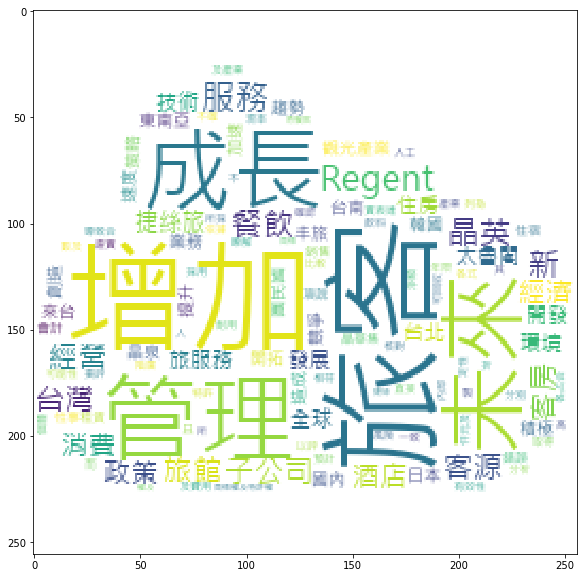

In [14]:
from PIL import Image
font = r"C:\Windows\Fonts\Microsoft JhengHei UI\msjh.ttc"
alice_mask = np.array(Image.open("cloudy.png"))
wordcloud = WordCloud(font_path=font,background_color="white", mask=alice_mask)
wordcloud.fit_words(wordDict)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.savefig("stockholder.png")

In [15]:
sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
sort[0:20]

[('旅客', 15),
 ('增加', 14),
 ('管理', 8),
 ('成長', 7),
 ('未來', 7),
 ('Regent', 7),
 ('服務', 7),
 ('新', 6),
 ('晶英', 6),
 ('餐飲', 6),
 ('台灣', 5),
 ('旅館', 5),
 ('客源', 5),
 ('子公司', 5),
 ('客房', 5),
 ('經營', 5),
 ('消費', 4),
 ('酒店', 4),
 ('經濟', 4),
 ('政策', 4)]

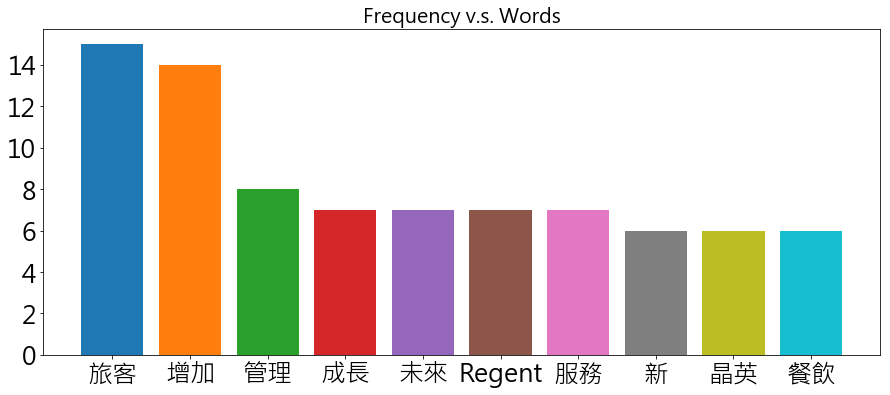

In [22]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

plt.figure(figsize=(15,6))
for i in range(10):
    plt.bar(sort[i][0], sort[i][1])
plt.title('Frequency v.s. Words', fontsize = 20)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.savefig("stockholderbar.png")